In [153]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
#Importing the NLTK library
import nltk
nltk.download('punkt_tab')#pre-trained tokenizer model 


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [155]:
#Import the dataframe
df_reviews= pd.read_csv('Reviews.csv')
df_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [156]:
df_reviews.shape


(568454, 10)

In [157]:
#Delete rows with null values.

df_reviews.isnull().sum()
df_reviews.info()

df_clean_rev = df_reviews[
    df_reviews['Summary'].notna() & (df_reviews['Summary'].str.strip() != '') &
    df_reviews['ProfileName'].notna() & (df_reviews['ProfileName'].str.strip() != '')
]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [158]:
df_clean_rev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568401 non-null  int64 
 1   ProductId               568401 non-null  object
 2   UserId                  568401 non-null  object
 3   ProfileName             568401 non-null  object
 4   HelpfulnessNumerator    568401 non-null  int64 
 5   HelpfulnessDenominator  568401 non-null  int64 
 6   Score                   568401 non-null  int64 
 7   Time                    568401 non-null  int64 
 8   Summary                 568401 non-null  object
 9   Text                    568401 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [159]:
#Change to lower case
df_lower_rev = df_clean_rev['Text'].str.lower()
#Change all text values to lower case


QUICK EDA

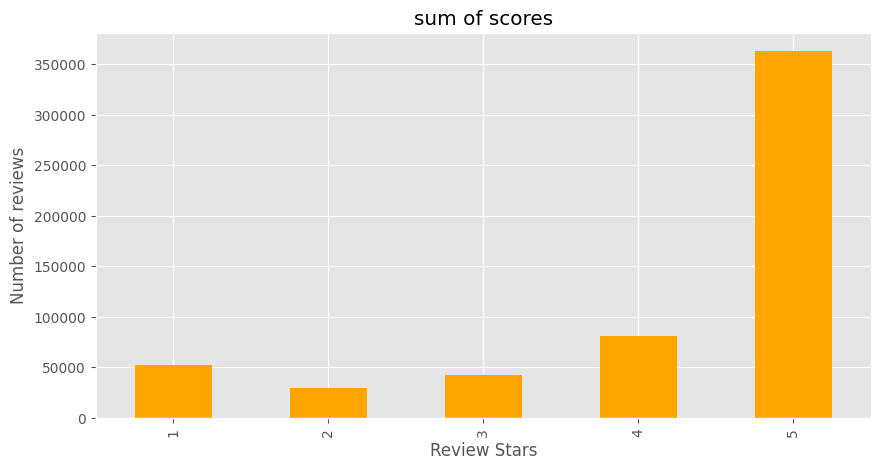

In [160]:
#Checking how the score is
ax = df_clean_rev['Score'].value_counts().sort_index().plot(kind = 'bar', title = 'sum of scores',color ='orange' ,figsize =(10,5))
ax.set_xlabel('Review Stars')
ax.set_ylabel('Number of reviews')
plt.show()

In [161]:
#Test if the word tokenizer is working
from nltk.tokenize import word_tokenize

# Example text (you can replace this with your dataset column)
example = df_clean_rev['Text'][30]  # Example text from your dataframe
print(example)

# Tokenizing the text into words
tokens = word_tokenize(example)
print(tokens)



I have never been a huge coffee fan. However, my mother purchased this little machine and talked me into trying the Latte Macciato. No Coffee Shop has a better one and I like most of the other products, too (as a usually non-coffee drinker!).<br />The little Dolche Guesto Machine is super easy to use and prepares a really good Coffee/Latte/Cappuccino/etc in less than a minute (if water is heated up). I would recommend the Dolce Gusto to anyone. Too good for the price and I'am getting one myself! :)
['I', 'have', 'never', 'been', 'a', 'huge', 'coffee', 'fan', '.', 'However', ',', 'my', 'mother', 'purchased', 'this', 'little', 'machine', 'and', 'talked', 'me', 'into', 'trying', 'the', 'Latte', 'Macciato', '.', 'No', 'Coffee', 'Shop', 'has', 'a', 'better', 'one', 'and', 'I', 'like', 'most', 'of', 'the', 'other', 'products', ',', 'too', '(', 'as', 'a', 'usually', 'non-coffee', 'drinker', '!', ')', '.', '<', 'br', '/', '>', 'The', 'little', 'Dolche', 'Guesto', 'Machine', 'is', 'super', 'eas

vader

In [162]:
from nltk.sentiment import SentimentIntensityAnalyzer#Imports the vader module
from tqdm.notebook import tqdm#Imports the progress bar

sia = SentimentIntensityAnalyzer()#Creates an object to analyze the words

In [164]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

Value Range	Meaning

-1 to -0.05	---->Negative sentiment
-0.05 to +0.05------>	Neutral sentiment
+0.05 to +1	----->Positive sentiment

In [165]:
#Run the scores on ll the data sets.
results = {}
for i, row in tqdm(df_clean_rev.iterrows(), total=len(df_clean_rev)):
    text = row['Text']
    myid = row['Id']
    results[myid] = sia.polarity_scores(text)

  0%|          | 0/568401 [00:00<?, ?it/s]

In [193]:
results#Dictionary containning the results
vaders = pd.DataFrame(results).T

In [173]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df_clean_rev, how='left')

In [174]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Value Range	Meaning

-1 to -0.05	---->Negative sentiment
-0.05 to +0.05------>	Neutral sentiment
+0.05 to +1	----->Positive sentiment

C:\Users\pc\AppData\Local\Temp\ipykernel_596\2251159355.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Score', y='compound', data=vaders, palette='colorblind')


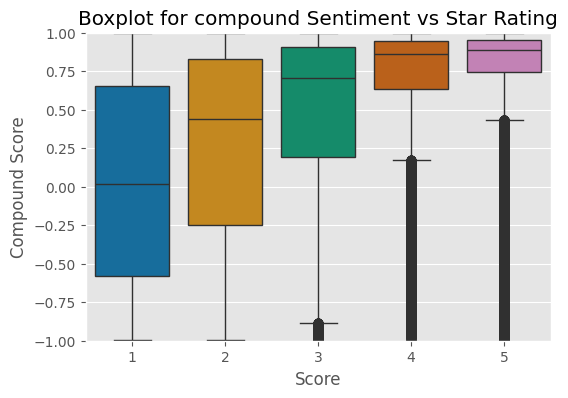

In [192]:
#Since the 
plt.figure(figsize=(6, 4))
sns.boxplot(x='Score', y='compound', data=vaders, palette='colorblind')
plt.ylim(-1, 1)
plt.title('Boxplot for compound Sentiment vs Star Rating')
plt.xlabel('Score')
plt.ylabel('Compound Score')
plt.show()
